<a href="https://colab.research.google.com/github/casjunior93/Calculo-de-Metricas-de-Avaliacao-de-Aprendizado/blob/main/desafio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cálculo de Métricas de Avaliação de Aprendizado

Neste projeto, vamos calcular as principais métricas para avaliação de modelos de classificação de dados, como acurácia, sensibilidade (recall), especificidade, precisão e F-score.

# Bibliotecas essenciais

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#Configura o pandas para não exibir resultados em notação científica
pd.options.display.float_format = '{:.2f}'.format

# Roteiro

Para criar a matriz de confusão que será usada nesse desafio, vou criar um modelo de classificação para dar suporte a essa matriz. Este modelo de classificação utiliza o conjunto de dados MNIST, composto por 70 mil imagens de algarismos escritos à mão. O objetivo é classificar os algarismos das imagens. Este exemplo de classificação está descrito no livro  Mãos à Obra: Aprendizado de Máquina com Scikit-Learn, Keras & TensorFlow, de Aurélien Géron.

Além de gerar a matriz e as métricas, será abordado também a validação cruzada.

# Obtendo os dados

In [2]:
from sklearn.datasets import fetch_openml

In [3]:
%%time
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

CPU times: user 44.5 s, sys: 2 s, total: 46.5 s
Wall time: 50.9 s


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

Conferindo os dados:

In [4]:
X, y = mnist['data'], mnist['target']

In [5]:
X.shape

(70000, 784)

In [6]:
y.shape

(70000,)

# Separando os dados em conjuntos de teste e treino

In [7]:
X_treino, X_teste, y_treino, y_teste = X[:60000], X[60000:], y[:60000], y[60000:]

# Utilizando um classificador multiclasse

O objetivo é criar um sistema que consiga classificar as imagens de algarismos em 10 classes, de 0 a 9.

In [8]:
from sklearn.svm import SVC

In [9]:
svm_clf = SVC()

In [10]:
%%time
svm_clf.fit(X_treino, y_treino)

CPU times: user 4min 1s, sys: 435 ms, total: 4min 2s
Wall time: 4min 1s


SVC()

# Acurácia

In [11]:
from sklearn.model_selection import cross_val_score

In [12]:
%%time
cross_val_score(svm_clf, X_treino, y_treino, cv=3, scoring='accuracy')

CPU times: user 12min 58s, sys: 1.03 s, total: 12min 59s
Wall time: 12min 54s


array([0.977 , 0.9738, 0.9739])

# Matriz de confusão para modelo multiclasse

Material de ajuda: 

[Confusion Matrix for Multiclass Classification](https://medium.com/mlearning-ai/confusion-matrix-for-multiclass-classification-f25ed7173e66)

In [13]:
from sklearn.metrics import plot_confusion_matrix, accuracy_score, recall_score, precision_score, plot_roc_curve

<Figure size 2520x2520 with 0 Axes>

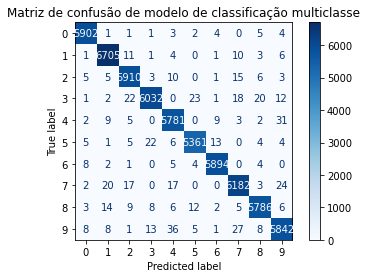

CPU times: user 9min 5s, sys: 580 ms, total: 9min 6s
Wall time: 9min 7s


In [14]:
%%time
plt.figure(figsize=(35, 35))
plot_confusion_matrix(svm_clf, X_treino, y_treino, cmap='Blues')
plt.title('Matriz de confusão de modelo de classificação multiclasse')
plt.show();

## FP, FN, VP, VN

In [20]:
%%time
from sklearn.model_selection import cross_val_predict
y_treino_pred = cross_val_predict(svm_clf, X_treino, y_treino)

CPU times: user 20min 22s, sys: 1.43 s, total: 20min 24s
Wall time: 20min 21s


In [22]:
%%time
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
matriz_conf = confusion_matrix(y_treino, y_treino_pred)

CPU times: user 175 ms, sys: 4 ms, total: 179 ms
Wall time: 182 ms


In [42]:
FP = matriz_conf.sum(axis=0) - np.diag(matriz_conf)  
FN = matriz_conf.sum(axis=1) - np.diag(matriz_conf)
VP = np.diag(matriz_conf)
VN = matriz_conf.sum() - (FP + FN + VP)

## Sensibilidade/Revocação/Recall

Ou taxa de verdadeiros positivos. Proporção de instâncias que são detectadas corretamente pelo classificador.

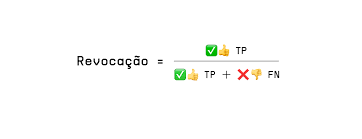

In [43]:
sensibilidade = VP / (VP + FN)
sensibilidade

array([0.9903765 , 0.98961732, 0.97717355, 0.96346436, 0.97757617,
       0.97122302, 0.98766475, 0.97685555, 0.96974876, 0.96385947])

## Precisão

Acurácia das predições positivas.

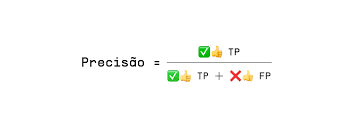

In [44]:
precisao = VP / (VP + FP)
precisao

array([0.98637969, 0.98552437, 0.97130464, 0.97491335, 0.97059823,
       0.97391787, 0.98334455, 0.97779198, 0.97257456, 0.97137049])

## Especificidade

Proporção de casos negativos que foram identificados corretamente.

In [45]:
especificidade = VN / (FP + VN)
especificidade

array([0.99850214, 0.9981599 , 0.99681729, 0.99717834, 0.99680564,
       0.99741659, 0.99816945, 0.99741323, 0.99704519, 0.99687332])

## F-score

Combina a precisão e a revocação em uma única métrica.

In [46]:
f_score = 2 * (precisao * sensibilidade) / (precisao + sensibilidade)
f_score

array([0.98837405, 0.98756661, 0.97423025, 0.96915505, 0.97407471,
       0.97256858, 0.98549992, 0.97732354, 0.97115961, 0.9676004 ])

## Acurácia

In [60]:
acuracia = (VP + VN) / X_treino.shape[0]
acuracia

array([0.9977    , 0.9972    , 0.99486667, 0.99373333, 0.99493333,
       0.99505   , 0.99713333, 0.99526667, 0.99438333, 0.9936    ])